In [73]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import datetime
import time
import json
import re
import ast
from fractions import Fraction as frac

%matplotlib inline

consumer_key = 'insert here'
consumer_secret = 'insert here'
access_token = 'insert here'
access_secret = 'insert here'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# Gather

Here's the file on hand:

In [74]:
df_enhanced=pd.read_csv('twitter-archive-enhanced.csv')
df_enhanced.timestamp=pd.to_datetime(df_enhanced.timestamp)
df_enhanced.retweeted_status_timestamp=pd.to_datetime(df_enhanced.retweeted_status_timestamp)


Here's the twitter api query 

In [75]:
"""missing=[]
with open('tweet_json.txt', 'w') as file:
    for my_id in df_enhanced.tweet_id:
        try:
            tweet = api.get_status(my_id, wait_on_rate_limit=True,
                                    wait_on_rate_limit_notify=True,
                                    tweet_mode="extended")
            file.write(str(tweet._json)+'\n')
        except:
            missing.append(my_id)
    print(missing)
"""

'missing=[]\nwith open(\'tweet_json.txt\', \'w\') as file:\n    for my_id in df_enhanced.tweet_id:\n        try:\n            tweet = api.get_status(my_id, wait_on_rate_limit=True,\n                                    wait_on_rate_limit_notify=True,\n                                    tweet_mode="extended")\n            file.write(str(tweet._json)+\'\n\')\n        except:\n            missing.append(my_id)\n    print(missing)\n'

In [76]:
import ast
n=0
pre_df=[]
with open('tweet_json.txt', 'r') as file:
    
    next_line=file.readline()
    #here's a regular expression I tried to fix the JSON formatting, but it still didn't work help
    """next_line=re.sub(r"'(\w)':",r"\"\1\":",next_line) 
    print(next_line)"""
    status=ast.literal_eval(next_line) #I needed to load the files in like this because I think I didn't format the JSONs properly. Works OK still.
    while next_line != '':
        if not status['retweeted']:#filters out for retweets
            try:
                pre_df.append({'tweet_id': status['id'],
                                   #'in_reply_to_status_id': str(status['in_reply_to_status_id']),
                                   #'in_reply_to_user_id': str(status['in_reply_to_user_id']),
                                   #'text': status['full_text'],
                                   #'timestamp': status['created_at'],
                                   #'source': status['source'],
                                   'favorite_count': status['favorite_count'],
                                   'retweet_count': status['retweet_count'],
                                  })
            except AttributeError:
                print(len(status.text))
        next_line=file.readline()
        if next_line != '':
            status=ast.literal_eval(next_line)
df_tweets=pd.DataFrame(pre_df)


In [77]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
favorite_count    2332 non-null int64
retweet_count     2332 non-null int64
tweet_id          2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB



And here's the file hosted on the web that I am downloading programmatically:

In [78]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
ai_predicts=requests.get(url)
with open('ai_predicts.tsv','wb') as file:
        file.write(ai_predicts.content)
df_ai=pd.read_csv('ai_predicts.tsv', delimiter='\t')


# Assess

In [79]:
df_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [80]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

In [81]:
df_enhanced.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
Toby              7
Buddy             7
Daisy             7
an                7
Bailey            7
Milo              6
Koda              6
Stanley           6
Rusty             6
Scout             6
Leo               6
Oscar             6
Bella             6
Dave              6
Jax               6
Jack              6
Chester           5
               ... 
Diogi             1
Bradlay           1
Rilo              1
Ed                1
Snoop             1
Randall           1
Bruiser           1
Bubba             1
Pepper            1
Howie             1
Amy               1
unacceptable      1
Cermet            1
Donny             1
Pherb             1
Dook              1
Dallas            1
Suki              1
by                1


I see some strange names that aren't capitalized. Noted.

In [82]:
df_enhanced.duplicated().sum()

0

In [83]:
for i in df_enhanced.columns:
    print(i,"\n", df_enhanced[i].duplicated(keep=False).sum(),'\n')

tweet_id 
 0 

in_reply_to_status_id 
 2280 

in_reply_to_user_id 
 2327 

timestamp 
 0 

source 
 2356 

text 
 0 

retweeted_status_id 
 2175 

retweeted_status_user_id 
 2333 

retweeted_status_timestamp 
 2175 

expanded_urls 
 217 

rating_numerator 
 2334 

rating_denominator 
 2343 

name 
 1694 

doggo 
 2356 

floofer 
 2356 

pupper 
 2356 

puppo 
 2356 



No tweet_ids are duplicated in df_enhanced

In [84]:
df_ai.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1264,749064354620928000,https://pbs.twimg.com/media/CmU2DVWWgAArvp3.jpg,2,pug,0.985222,True,Brabancon_griffon,0.003314,True,Pekinese,0.002989,True
41,666701168228331520,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,1,Labrador_retriever,0.887707,True,Chihuahua,0.029307,True,French_bulldog,0.020756,True
501,675853064436391936,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True
86,667517642048163840,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1,Italian_greyhound,0.125176,True,standard_poodle,0.084572,True,cocker_spaniel,0.081347,True
1217,743595368194129920,https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg,1,hippopotamus,0.505675,False,hog,0.370726,False,warthog,0.018827,False
1924,857263160327368704,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,keeshond,0.000311,True
1376,763183847194451968,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,1,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False
1678,813202720496779264,https://pbs.twimg.com/media/C0kTjqIXgAAqpRi.jpg,1,cocker_spaniel,0.701852,True,golden_retriever,0.120345,True,Labrador_retriever,0.036320,True
1579,796177847564038144,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False
122,668221241640230912,https://pbs.twimg.com/media/CUX_rAyWsAYZOQ5.jpg,1,chow,0.395101,True,golden_retriever,0.372115,True,Labrador_retriever,0.148785,True


In [85]:
df_ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [86]:
retweets=df_enhanced[~df_enhanced.retweeted_status_id.isnull()].tweet_id.values
df_enhanced[df_enhanced.tweet_id.isin(retweets)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


This next bit is showing where the doggo rating may be off by comparing a search for doggo in text with what the doggo column shows. Not all of these should be doggo, but some are definitely off!

In [87]:
df_enhanced[(df_enhanced.text.str.lower().str.contains('doggo')!=df_enhanced.doggo.str.contains('doggo'))][['tweet_id','text','doggo']].values

array([[876537666061221889,
        'I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu',
        'None'],
       [841439858740625411,
        'Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL',
        'None'],
       [836648853927522308,
        'RT @SchafeBacon2016: @dog_rates Slightly disturbed by the outright profanity, but confident doggos were involved. 11/10, would tailgate aga…',
        'None'],
       [816062466425819140,
        "RT @dog_rates: Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://…",
        'None'],
       [815990720817401858,
        "Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p",
 

In [88]:
df_enhanced[(df_enhanced.text.str.lower().str.contains('floofer')!=df_enhanced.floofer.str.contains('floofer'))][['tweet_id','text','floofer']].values

array([], shape=(0, 3), dtype=object)

In [89]:
df_enhanced[(df_enhanced.text.str.lower().str.contains('puppo')!=df_enhanced.puppo.str.contains('puppo'))][['tweet_id','text','puppo']].values

array([[876120275196170240,
        'Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek',
        'None'],
       [871879754684805121,
        "Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w",
        'None'],
       [866686824827068416,
        "This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z",
        'None'],
       [858843525470990336,
        "I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq",
        'None'],
       [848213670039564288,
        'Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreac

In [90]:
df_enhanced[(df_enhanced.text.str.lower().str.contains('pupper')!=df_enhanced.pupper.str.contains('pupper'))][['tweet_id','text','pupper']].values

array([[881666595344535552,
        "This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s",
        'None'],
       [807010152071229440,
        "This is Lennon. He's a Boopershnoop Pupperdoop. Quite rare. Exceptionally pettable. 12/10 would definitely boop that shnoop https://t.co/fhgP6vSfhX",
        'None'],
       [748575535303884801,
        "This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd",
        'None'],
       [746056683365994496,
        'This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx',
        'None'],
       [737310737551491075,
        "Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10 https://t.co/wvjqSCN6iC",
        'None'],
       [714606013974974464,
        'Here are two lil cuddly puppers. Both 12

In [91]:
df_tweets[df_tweets.tweet_id.isin(retweets)]

,favorite_count,retweet_count,tweet_id
31,0,101,886054160059072513
35,0,17336,885311592912609280
67,0,6372,879130579576475649
72,0,1206,878404777348136964
73,0,6255,878316110768087041
77,0,74,877611172832227328
90,0,13733,874434818259525634
95,0,1503,873337748698140672
105,0,5417,871166179821445120
119,0,1987,868639477480148993


In [92]:
df_ai.tweet_id.duplicated().sum()

0

In [93]:
df_ai[df_ai.tweet_id.isin(retweets)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1330,757597904299253760,https://pbs.twimg.com/media/CoOGZjiWAAEMKGx.jpg,1,doormat,0.836106,False,wallet,0.056627,False,purse,0.051333,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


## Quality Issues:
### enhanced tweet data
- The tweet with tweet_id 810984652412424192 at index 499 doesn't actually contain a rating and should be dropped
    - tweet_id 832645525019123713 also isn't a dog rating
    - tweet_id 835246439529840640 also isn't a dog rating
- tweet_id 666287406224695296 at index 2311 has incorrect rating 
    - many other incorrect ratings should be programmatically replaced as well
- Many names are bad. Specifically those names that aren't capitalized aren't valid names. Many can be identified with a better regex that includes "named [name]" or "name is [name]" and not just "This is [name]"
- However, some names still are not correctly identified programmatically and must be manually set. The ones I've uncovered with a thorough visual assessment (though there are likely many others) include:
    - id 828650029636317184 is Grace
    - id 792913359805018113 is Forrest
    - id 748692773788876800 is Quizno
- id 841439858740625411 shows 'None' in doggo column, but should be doggo
- id 746056683365994496 shows 'None' in pupper column, but should be pupper
    - in general, the extraction process for finding doggo and pupper ignored cases where the author uses the plural "doggos" or "puppos," but as per a visual inspection, these will need to be inspected in more depth at a later time, as these words are not always referring to the dog being rated in the tweet. A blanket replacement using "doggos" or "puppos" is not advised.
- types are off. all "id" type columns should be type str: tweet_id, in_reply_to_user_id, in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id
- some tweets in the enhanced file are deleted tweets (didn't come back from the API query)
- some tweets are retweets, captured in the variable `retweets`
- rating should be a numerical type that can be numerically useful (float)

### AI predictions
- the tweets that aren't live according to my twitter API query need to be dropped from this database too (deleted/retweets) 

### df_tweets
- Some tweets are still retweets

## Tidiness Issues:
- df_tweets should be merged with df_enhanced as the columns "retweets" and "favorites" are natural extensions of the enhanced data
- apparently df_ai should be merged with the other two tables as well (but I think this probably doesn't conform with tidy data principals, and my mentor agrees?)
- puppo/floofer etc should be one column: "stage"
- numerator and denominator actually represent one idea: rating. should be one string column `rating` to preserve original string of the rating and another float column `rating_value` that holds the numerically useful float value represented by the rating as documented above.


# Cleaning

First, create a copy of everything.

In [94]:
df_tweets2=df_tweets.copy()
df_enhanced2=df_enhanced.copy()
df_ai2=df_ai.copy()

First, I address the merging of df_tweets and df_enhanced, and get rid of the rows that didn't come back from the api query by keeping only the tweet ids of the df_tweets (which naturally screened for deleted tweets and retweets).

#### Define
All three tables need to be merged using the merge function and using the tweet_ids I got back from twitter, thus the `how="left"` arguments

#### Code

In [95]:
df_tweets_plus_ai=df_tweets.merge(df_ai2, on="tweet_id", how="left")

In [96]:
df_both=df_tweets_plus_ai.merge(df_enhanced2, on="tweet_id", how='left')#how=left keeps only rows that have tweets that are not retweets and are not deleted

#### Test

It appears that all the dataframes merged correctly with the correct number of rows

In [97]:
len(df_tweets2.index),len(df_ai2.index),len(df_enhanced2.index)

(2332, 2075, 2356)

In [98]:
df_both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 0 to 2331
Data columns (total 30 columns):
favorite_count                2332 non-null int64
retweet_count                 2332 non-null int64
tweet_id                      2332 non-null int64
jpg_url                       2061 non-null object
img_num                       2061 non-null float64
p1                            2061 non-null object
p1_conf                       2061 non-null float64
p1_dog                        2061 non-null object
p2                            2061 non-null object
p2_conf                       2061 non-null float64
p2_dog                        2061 non-null object
p3                            2061 non-null object
p3_conf                       2061 non-null float64
p3_dog                        2061 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2332 non-null datetime64[ns]
source             

To aid in my assessment of the ratings, I did my own version of extracting the scores and compared my ratings with the ratings in  df_enhanced.

In [99]:
df_both.text.str.extract(r'(?P<my_numerator>(?:\d+)|(?:\d+\.\d+))/(?P<my_denominator>\d{2,3})').my_numerator.value_counts()

12       553
11       463
10       459
13       339
9        158
8        102
7         54
14        51
5         35
6         32
3         19
4         17
2          9
1          8
420        2
15         2
9.75       2
0          2
1776       1
13.5       1
11.27      1
960        1
45         1
182        1
99         1
9.5        1
80         1
84         1
50         1
144        1
44         1
143        1
121        1
88         1
17         1
666        1
007        1
60         1
204        1
20         1
11.26      1
165        1
Name: my_numerator, dtype: int64

In [100]:
df_both.text.str.extract(r'(?P<my_numerator>(?:\d+)|(?:\d+\.\d+))/(?P<my_denominator>\d{2,3})').my_denominator.value_counts()

10     2311
50        3
20        2
11        2
80        2
90        1
00        1
70        1
120       1
40        1
16        1
110       1
150       1
170       1
15        1
130       1
Name: my_denominator, dtype: int64

In [101]:
df_both2=df_both.merge(df_both.text.str.extract(r'(?P<my_numerator>(?:\d+)|(?:\d+\.\d+))/(?P<my_denominator>\d{2,3})'), left_index=True, right_index=True)


One value was null based on my method, and turned out it did not have a valid rating. I added it to my list above.

In [102]:
df_both2[df_both2.my_numerator.isnull()].text.values[0]


'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [103]:
df_both2[df_both2.my_numerator.isnull()].index


Int64Index([499], dtype='int64')

#### Define
Now to drop index 499 because it doesn't contain a rating

#### Code

In [104]:
df_both2=df_both2.drop(499,axis=0)#no rating 


#### Test

In [105]:
499 in df_both2.index

False

Now, where else does my rating not match theirs?

In [106]:
df_both2.my_numerator=df_both2.my_numerator.astype(float)
df_both2.my_denominator=df_both2.my_denominator.astype(float)

In [107]:
df_both2[(df_both2['my_numerator']!=df_both2['rating_numerator'])][['tweet_id','text']].values


array([[883482846933004288,
        'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'],
       [832215909146226688,
        "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"],
       [786709082849828864,
        "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"],
       [778027034220126208,
        "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"],
       [681340665377193984,
        "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"],
       [680494726643068929,
        'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 http

Save those IDs

In [108]:
bad_ratings=df_both2[(df_both2['my_numerator']!=df_both2['rating_numerator'])][['tweet_id','text']].tweet_id.values
bad_ratings


array([883482846933004288, 832215909146226688, 786709082849828864,
       778027034220126208, 681340665377193984, 680494726643068929,
       666287406224695296])

#### Define
Replace `rating_numerator` with `my_numerator` and `rating_denominator` with `my_denominator`

#### Code

In [109]:
df_both2.rating_numerator=df_both2.my_numerator
df_both2.rating_denominator=df_both2.my_denominator


#### Test
looks like the column is much improved!

In [110]:
df_both2[df_both2.tweet_id.isin(bad_ratings)][['rating_numerator',
                                               'rating_denominator']]

,rating_numerator,rating_denominator
44,13.50,10.0
326,9.75,10.0
677,9.75,10.0
744,11.27,10.0
1666,9.50,10.0
1689,11.26,10.0
2311,9.00,10.0


Now to look into the names that are valid. I create a column to see if the name is not capitalized:

In [111]:
df_both2['valid_name']=df_both2.name.apply(lambda x: True if x[0]==x[0].upper() else False)

In [112]:
bad_names=df_both2[df_both2.valid_name!=True][['text','tweet_id']]

And now to inspect the bad_names dataframe visually to see if I can find any patterns in the errors:

In [113]:
bad_names.values

array([[ "I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba",
        887517139158093824],
       [ 'Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF',
        881536004380872706],
       [ "We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9",
        859196978902773760],
       [ "Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",
        855459453768019968],
       [ "There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7",
        832645525019123713],
       [ "Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grac

I noticed many names are introduced with different phrases, such as "[dog] is named" or "[dog's] name is" so I created a custom regular expression to search for these kinds of phrases. A few other tweets didn't fit this mold, so I documented them individually in the Assessment chart above for manual replacement later.

In [114]:
bad_names=bad_names.merge(bad_names.text.str.extract(r'(?:named |name is )(?P<possible_name>[A-Z]\w+)'), left_index=True, right_index=True)
bad_names[~bad_names.possible_name.isnull()].head()

,text,tweet_id,possible_name
831,This is my dog. Her name is Zoey. She knows I'...,765395769549590528,Zoey
1829,This is a Sizzlin Menorah spaniel from Brookly...,675706639471788032,Wylie
1931,This is a Lofted Aphrodisiac Terrier named Kip...,673636718965334016,Kip
2010,This is a Tuscaloosa Alcatraz named Jacob (Yac...,671743150407421952,Jacob
2042,This is a Helvetica Listerine named Rufus. Thi...,671147085991960577,Rufus


Next, any value my regular expression didn't catch should be null because either there is no name or there's no predictable pattern to extract the name and will need to be meticulously combed through at a later time.

#### Define
Replace the name values in `df_both2` with the `possible_name` column of `bad_names` by looping through the tweet_ids from `bad_names` and replacing the name of that tweet_id in `df_both2`

#### Code

In [115]:

for i in bad_names.tweet_id.values:
    df_both2.loc[df_both2.tweet_id==i,'name']=bad_names[bad_names.tweet_id==i]['possible_name']
    

#### Test
Using a quick visual inspection, it looks like I got rid of all the funky names in `df_both2`

In [116]:
df_both2.name.value_counts().index.values

array(['None', 'Oliver', 'Cooper', 'Charlie', 'Lucy', 'Lola', 'Tucker',
       'Penny', 'Winston', 'Bo', 'Sadie', 'Toby', 'Buddy', 'Bailey',
       'Daisy', 'Koda', 'Jack', 'Bella', 'Dave', 'Stanley', 'Oscar',
       'Scout', 'Leo', 'Rusty', 'Milo', 'Jax', 'Louis', 'Bentley', 'Gus',
       'Larry', 'Oakley', 'Chester', 'George', 'Finn', 'Alfie', 'Sunny',
       'Maximus', 'Ruby', 'Bear', 'Dexter', 'Loki', 'Duke', 'Maddie',
       'Hank', 'Cassie', 'Moose', 'Zoey', 'Jerry', 'Gary', 'Maggie',
       'Phil', 'Boomer', 'Shadow', 'Sophie', 'Clarence', 'Beau', 'Scooter',
       'Chip', 'Gerald', 'Winnie', 'Archie', 'Riley', 'Bruce', 'Carl',
       'Clark', 'Jeffrey', 'Sampson', 'Derek', 'Brody', 'Reginald', 'Rory',
       'Olive', 'Wyatt', 'Rosie', 'Zeke', 'Frankie', 'Louie', 'Peaches',
       'Earl', 'Reese', 'Lorenzo', 'Wilson', 'Waffles', 'Colby', 'Malcolm',
       'Wallace', 'Samson', 'Paisley', 'Sebastian', 'Kyle', 'Steven',
       'Ellie', 'Klevin', 'Rufus', 'Mia', 'Jimothy', 'Calvin',

Now to fill in a few values I documented from the visual inspection of the bad_names tweets recalling the following values I documented:
    - id 828650029636317184 is Grace
    - id 792913359805018113 is Forrest
    - id 765395769549590528 is Zoey
    - id 748692773788876800 is Quizno
    - id 675706639471788032 is Wylie
    - id 673636718965334016 is Kip
    - id 666701168228331520 is Johm

In [117]:

df_both2[df_both2.tweet_id.isin([828650029636317184,
                               792913359805018113,
                               765395769549590528,
                               748692773788876800,
                               675706639471788032,
                               673636718965334016,
                               666701168228331520])].name.values



array([nan, nan, 'Zoey', nan, 'Wylie', 'Kip', 'Johm'], dtype=object)

OK, it looks like my regex took care of some but not all that I had noted during my visual inspection. Time to fix Grace, Forrest, and Quizno.


#### Define
The three names I found that were not programmatically extractable with regular expressions must be set manually. I will do this by setting the values directly at the right location by referencing the tweet_id and .loc method.

#### Code

In [118]:
df_both2.loc[df_both2.tweet_id==828650029636317184, 'name']='Grace'
df_both2.loc[df_both2.tweet_id==792913359805018113, 'name']='Forrest'
df_both2.loc[df_both2.tweet_id==748692773788876800, 'name']='Quizno'


#### Test

In [119]:
df_both2[df_both2.tweet_id.isin([828650029636317184,
                               792913359805018113,
                               765395769549590528,
                               748692773788876800,
                               675706639471788032,
                               673636718965334016,
                               666701168228331520])].name.values

array(['Grace', 'Forrest', 'Zoey', 'Quizno', 'Wylie', 'Kip', 'Johm'], dtype=object)

#### Define:
Changing types according to my note above:
- types are off. all "id" type columns should be type str: tweet_id, in_reply_to_user_id, in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id

I'll use the .astype method.

#### Code

In [120]:
df_both2=df_both2.astype({'tweet_id':'str',
                           'in_reply_to_user_id':'str',
                           'in_reply_to_status_id':'str',
                           'retweeted_status_id':'str'})

#### Test

In [121]:
for col in ['tweet_id',
            'in_reply_to_user_id',
            'in_reply_to_status_id',
            'retweeted_status_id']:
    print(col,'is type: ', type(df_both2[col].values[0]))

tweet_id is type:  <class 'str'>
in_reply_to_user_id is type:  <class 'str'>
in_reply_to_status_id is type:  <class 'str'>
retweeted_status_id is type:  <class 'str'>


#### Define
We'll fix the tidiness issues next: first combine the numerator and denominators into a single string that shows a fraction value. Then we'll strip out any `'.0'` because these are not a part of the original rating string. Finally, we'll get a numeric float value from the fraction using the fractions module.

#### Code

In [122]:
df_both2['slash']='/'
df_both2['rating']=df_both2.rating_numerator.astype('str')+df_both2.slash+df_both2.rating_denominator.astype('str')
df_both2['rating']=df_both2.rating.apply(lambda x: x.replace('.0',''))
df_both2['rating_value']=df_both2.rating_numerator/df_both.rating_denominator
df_both2=df_both2.drop('slash',axis=1)

#### Test

In [123]:
df_both2.rating.value_counts()

12/10       553
11/10       462
10/10       459
13/10       339
9/10        157
8/10        102
7/10         54
14/10        51
5/10         35
6/10         32
3/10         19
4/10         15
2/10          9
1/10          8
420/10        2
9.75/10       2
15/10         2
4/20          2
0/10          2
11.26/10      1
165/150       1
144/120       1
13.5/10       1
60/50         1
11/15         1
17/10         1
99/90         1
143/130       1
1776/10       1
88/80         1
84/70         1
80/80         1
50/50         1
11.27/10      1
44/40         1
666/10        1
960/0         1
9/11          1
204/170       1
121/110       1
7/11          1
9.5/10        1
45/50         1
182/10        1
20/16         1
Name: rating, dtype: int64

In [124]:
df_both2.rating_value.value_counts()

1.200000      557
1.100000      468
1.000000      461
1.300000      339
0.900000      157
0.800000      102
0.700000       54
1.400000       51
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
1.500000        2
0.000000        2
0.975000        2
1.350000        1
4.500000        1
inf             1
1.700000        1
1.250000        1
0.950000        1
1.127000        1
0.818182        1
66.600000       1
0.636364        1
18.200000       1
177.600000      1
1.126000        1
0.733333        1
Name: rating_value, dtype: int64

Whoops! That helped me discover another tweet that should be dropped from the set: 960/0 was not a dog rating (but a worthwhile thread to read! https://twitter.com/dog_rates/status/835246439529840640)

#### Define
tweet ids 835246439529840640, 832645525019123713 and are not tweets, so they should be dropped. Note `tweet_id` must now be referenced as a string

In [125]:
df_both2[df_both2.rating=='960/0'][['tweet_id','text']].values

array([['835246439529840640',
        "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]], dtype=object)

Time to drop it (and the other tweet that wasn't a dog rating that I noted in the Assess section above):

In [126]:
df_both2[df_both2.tweet_id=='832645525019123713'].text.values

array([ "There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  \nhttps://t.co/dp5h9bCwU7"], dtype=object)

#### Code

In [127]:
tweet_id_indeces=df_both2[df_both2.tweet_id.isin(['832645525019123713',
                                                 '835246439529840640'])].index
df_both2=df_both2.drop(tweet_id_indeces,axis=0)


#### Test

In [128]:
df_both2[df_both2.tweet_id.isin(['832645525019123713','835246439529840640'])]

,favorite_count,retweet_count,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,...,name,doggo,floofer,pupper,puppo,my_numerator,my_denominator,valid_name,rating,rating_value


#### Define
id 841439858740625411 shows 'None' in doggo column, but should be doggo, so I will replace that


#### Code

In [129]:
df_both2.loc[df_both2.tweet_id=='841439858740625411','doggo']='doggo'

#### Test

In [130]:
df_both2[df_both2.tweet_id=='841439858740625411'].doggo

256    doggo
Name: doggo, dtype: object

#### Define
id 746056683365994496 shows 'None' in pupper column, but should be pupper, so I'll replace that too

#### Code

In [131]:
df_both2.loc[df_both2.tweet_id=='746056683365994496','pupper']='pupper'

#### Test

In [132]:
df_both2[df_both2.tweet_id=='746056683365994496'].pupper

1004    pupper
Name: pupper, dtype: object

#### Define
Puppo/floofer etc.. rows should be merged into one value: dog_stage. I will add them together as strings so as to catch any cases where multiple stages occur.

#### Code

In [133]:
def dog_stage_maker(row):
    s=''
    stages=['doggo','floofer','pupper','puppo']
    for stage in stages:
        if row[stage]!='None':
            s=s+ ', ' +row[stage]
    return re.sub(r'^, ','',s)

df_both2['dog_stage']=df_both2.apply(lambda x: dog_stage_maker(x),axis=1)


#### Test

In [134]:
df_both2['dog_stage'].value_counts()

                  1951
pupper             245
doggo               81
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [135]:
df_both2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2331
Data columns (total 36 columns):
favorite_count                2329 non-null int64
retweet_count                 2329 non-null int64
tweet_id                      2329 non-null object
jpg_url                       2060 non-null object
img_num                       2060 non-null float64
p1                            2060 non-null object
p1_conf                       2060 non-null float64
p1_dog                        2060 non-null object
p2                            2060 non-null object
p2_conf                       2060 non-null float64
p2_dog                        2060 non-null object
p3                            2060 non-null object
p3_conf                       2060 non-null float64
p3_dog                        2060 non-null object
in_reply_to_status_id         2329 non-null object
in_reply_to_user_id           2329 non-null object
timestamp                     2329 non-null datetime64[ns]
source          

#### Define
Some tweets are retweets (They begin with `'RT'`) and must be dropped from the master dataframe. These tweet ids were stored earlier in the variable `retweets`

#### Code

In [136]:
df_both2=df_both2.drop(df_both[df_both.tweet_id.isin(retweets)].index, axis=0)

#### Test
The only remaining tweets that start with "RT" appear to be valid ratings:

In [137]:
df_both2[(df_both2.text.str[:2]=="RT")].text.values

array([ 'RT if you are as ready for summer as this pup is 12/10 https://t.co/xdNNEZdGJY',
       'RT until we find this dog. Clearly a cool dog (front leg relaxed out window). Looks to be a superb driver. 10/10 https://t.co/MnTrKaQ8Wn'], dtype=object)

Finally, now I'll store the progress in a tidy master csv file:

In [138]:
df_both2=df_both2.drop(['rating_numerator','rating_denominator','my_numerator','my_denominator','valid_name','doggo','floofer','pupper','puppo'],axis=1)
df_both2.to_csv('twitter_archive_master.csv',index=False)


# Visualizations

In [147]:
df_tweets=pd.read_csv('twitter_archive_master.csv',index_col="tweet_id",
                      parse_dates=['timestamp','retweeted_status_timestamp'])

import statsmodels.api as sm
df_tweets['intercept']=1

First of all, the ratings have some pretty extreme outliers (such as 1776/10) that need to be discarded to keep from throwing off the ratings data. Also, it appears that ratings higher than 14/10 have only been joked about:

In [148]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 892420643555336193 to 666020888022790149
Data columns (total 27 columns):
favorite_count                2165 non-null int64
retweet_count                 2165 non-null int64
jpg_url                       1986 non-null object
img_num                       1986 non-null float64
p1                            1986 non-null object
p1_conf                       1986 non-null float64
p1_dog                        1986 non-null object
p2                            1986 non-null object
p2_conf                       1986 non-null float64
p2_dog                        1986 non-null object
p3                            1986 non-null object
p3_conf                       1986 non-null float64
p3_dog                        1986 non-null object
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2165 non-null datetime64[ns]
source                        2165 non

In [149]:
df_tweets[df_tweets.index.duplicated()]

,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,...,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rating,rating_value,dog_stage,intercept
tweet_id,,,,,,,,,,,,,,,,,,,,,


In [150]:
df_tweets[df_tweets.rating_value<frac(20,10)].sort_values('rating_value',ascending=False).head().text.values

array([ '@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s',
       '@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10',
       "This is Iggy. He was a rescue dog killed in the Stockholm attack. His memorial started with a collar and four bones. It's grown a bit. 14/10 https://t.co/E4a0R9my1M",
       '"I wish we were dogs" 14/10 for @BadlandsNPS https://t.co/50qq2DItPW',
       "Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9"], dtype=object)

So, lets only keep ratings less than 15/10.

In [151]:
no_outliers=df_tweets[df_tweets.rating_value<frac(15,10)]

In [179]:
drop_me=no_outliers[no_outliers.dog_stage.isin(['doggo, floofer',
                                                'doggo, pupper',
                                                'doggo, puppo'])].index
no_multiple=no_outliers.drop(drop_me)

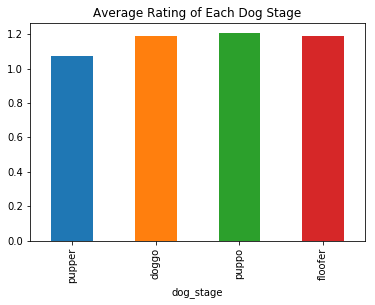

In [191]:
no_multiple.groupby('dog_stage').rating_value.mean().reindex(['pupper','doggo','puppo','floofer']).plot(kind='bar',
                                             title='Average Rating of Each Dog Stage');

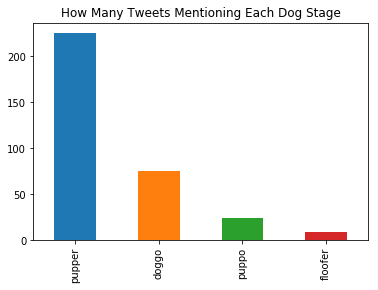

In [181]:
no_multiple.dog_stage.value_counts().plot(kind='bar',
                                       title='How Many Tweets Mentioning Each Dog Stage');

So it appears that pupper is by far the most common dog stage rated by WeRateDogs! Perhaps what contributes to the mean of this group's nearness to the mean of the population (law of large numbers):

In [182]:
no_multiple.groupby('dog_stage').mean().rating_value

dog_stage
doggo      1.186667
floofer    1.188889
pupper     1.073898
puppo      1.204167
Name: rating_value, dtype: float64

In [183]:
no_multiple.rating_value.mean()

1.0604969131878224

I'm also curious to see if their ratings have inflated over time or not. to do this, I'll find weekly averages and plot them on a line graph.


In [185]:
def find_week(date, startdate):
    return int((date-startdate).days/7)

In [186]:
start=no_outliers.sort_values('timestamp').loc[666020888022790149,'timestamp']
no_outliers['week_number']=no_outliers.timestamp.apply(lambda x: find_week(x,start))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


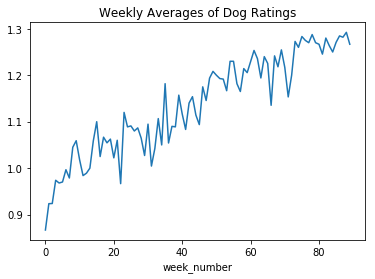

In [187]:
no_outliers.groupby('week_number').rating_value.mean().plot(kind='line', title='Weekly Averages of Dog Ratings');


Now that's an upward trend! It certainly seems to be the case that ratings inflated with time over this time period.

Finally, I'd like to explore the question: Do higher dog ratings correlate with the number favorites on that tweet?

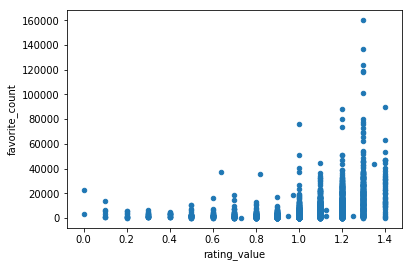

In [188]:
no_outliers.plot(x='rating_value', y='favorite_count', kind='scatter');

In [189]:
sm.OLS(no_outliers['favorite_count'],
       no_outliers[['intercept','rating_value']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     341.3
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           7.52e-71
Time:                        22:19:09   Log-Likelihood:                -23207.
No. Observations:                2157   AIC:                         4.642e+04
Df Residuals:                    2155   BIC:                         4.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept    -1.353e+04   1208.460    -11.195      0.000   -1.59e+04   -1.12e+04
rating_value  2.061e+04   1115.427     18.473      0.000    1.84e+04    2.28e+04
==============================================================================
Omnibus:                     2116.661   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129982.684
Skew:                           4.633   Prob(JB):                         0.00
Kurtosis:                      39.884   Cond. No.                         9.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visually speaking there appears to be only slight positive correlation between the rating value and the favorite count. This is supported by the coefficient (1.813e+04) and the P value (0.000) on rating_value's regression model.

In [ ]:

"""
def has_media(t):
    media=t.entities.get('media',[])
    if len(media)>0:
        if 'video' in media[0]['expanded_url']:
            return 'video'
        else:
            return 'image'
    else:
        return None
"""